# Company_Data.csv

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [29]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [30]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [32]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

<AxesSubplot:>

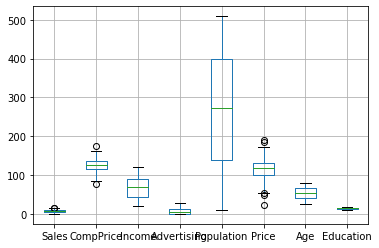

In [49]:
df.boxplot()

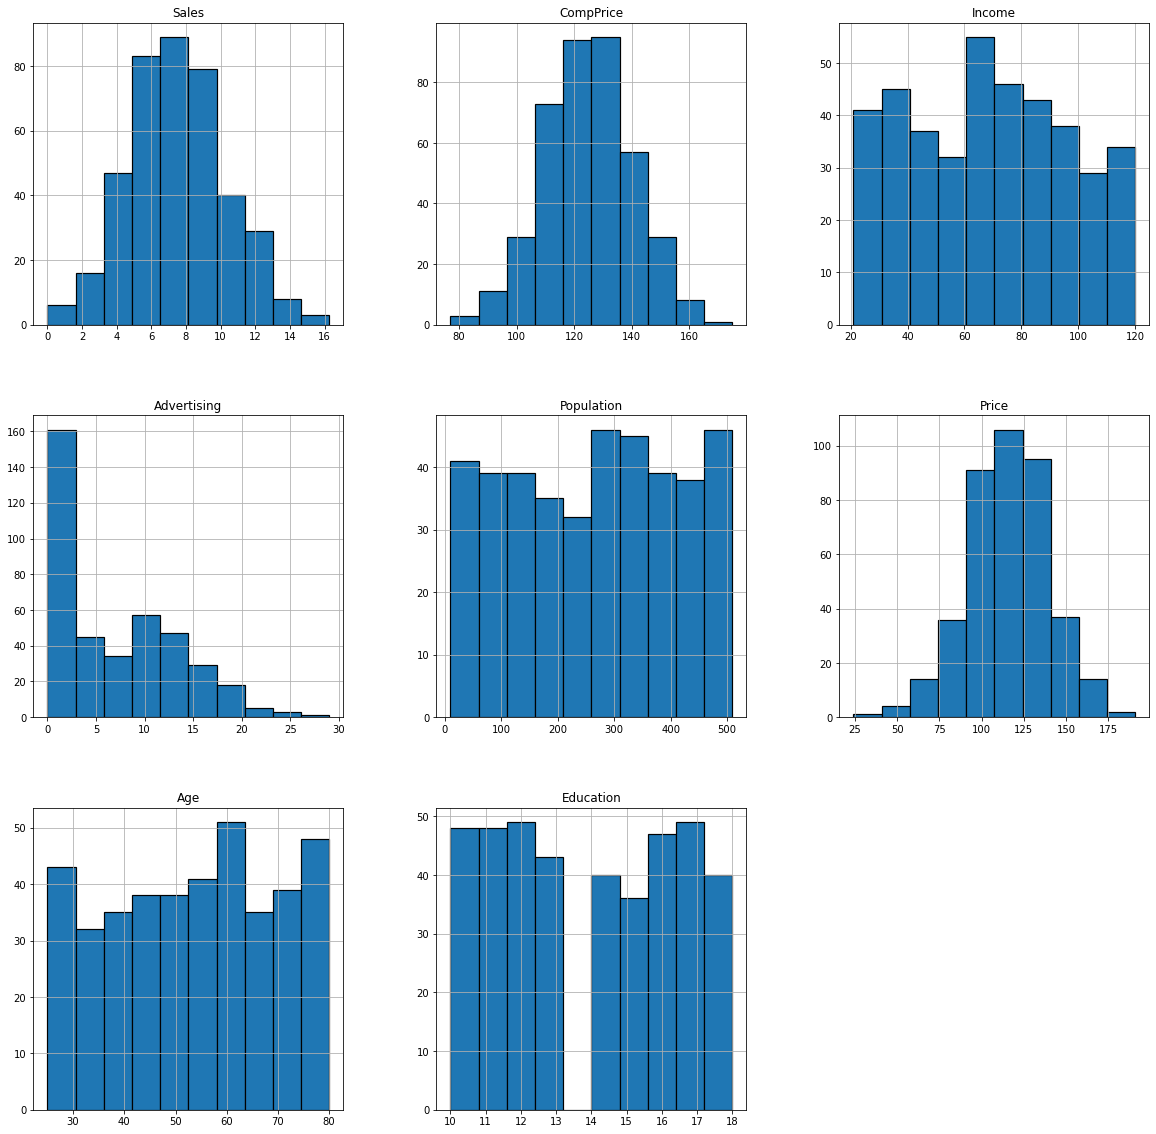

In [17]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<AxesSubplot:>

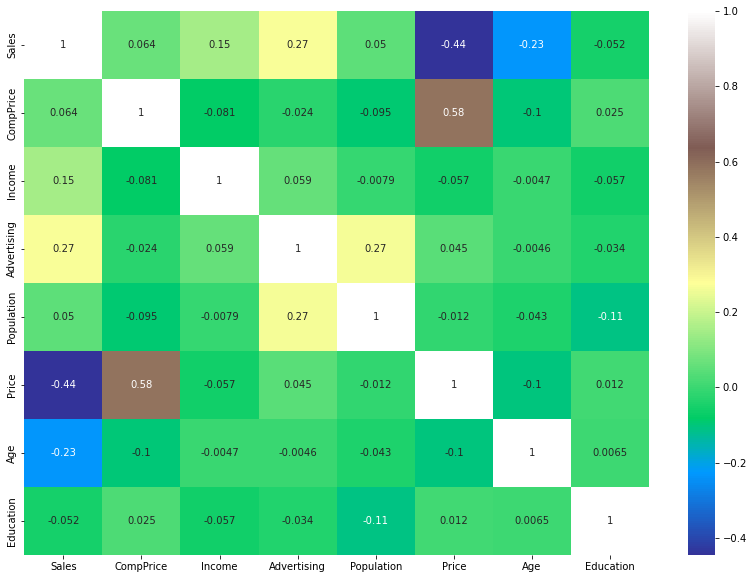

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [3]:
df1=pd.Series(df['Sales'])
s=[]
for i in df1:
    if i>9:
        s.append('good')
    
    else:
        s.append('bad')

print(s)

['good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad'

In [4]:
df2=pd.DataFrame(s)
df3=pd.concat([df2,df],axis=1)
df3=df3.rename({0:'o/p'},axis=1)
df3

,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,good,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,bad,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,bad,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,good,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,bad,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,bad,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,bad,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
labelencoder = LabelEncoder()
df3.iloc[:, 7] = labelencoder.fit_transform(df3.iloc[:,7])
df3.iloc[:,-2]=labelencoder.fit_transform(df3.iloc[:,-2])
df3.iloc[:,-1]=labelencoder.fit_transform(df3.iloc[:,-1])
df3.iloc[:,0]=labelencoder.fit_transform(df3.iloc[:,0])

In [6]:
df3


,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,0,42,17,1,1
1,1,11.22,111,48,16,260,83,1,65,10,1,1
2,1,10.06,113,35,10,269,80,2,59,12,1,1
3,0,7.40,117,100,4,466,97,2,55,14,1,1
4,0,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,12.57,138,108,17,203,128,1,33,14,1,1
396,0,6.14,139,23,3,37,120,2,55,11,0,1
397,0,7.41,162,26,12,368,159,2,40,18,1,1
398,0,5.94,100,79,7,284,95,0,50,12,1,1


In [7]:
array=df3.values
X=array[:,2:10]
Y=array[:,0]

 # Bagged Decision Trees for Classification


In [26]:
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10, random_state=7 , shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.8225000000000001


# Random Forest Classification

In [22]:
num_trees = 100
max_features = 3 #supplying 3 features for each subsamples
kfold = KFold(n_splits=10, random_state=7, shuffle= True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.8375000000000001


# AdaBoost Classification


In [28]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10 #connecting in squence 
seed=7 #random state
kfold = KFold(n_splits=10, random_state=seed , shuffle= True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8450000000000001


# Fraud_check.csv

In [9]:
frd=pd.read_csv('Fraud_check.csv')
frd

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [42]:
frd.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [41]:
frd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [43]:
frd.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [48]:
frd.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

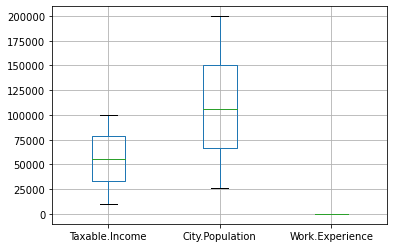

In [46]:
frd.boxplot()

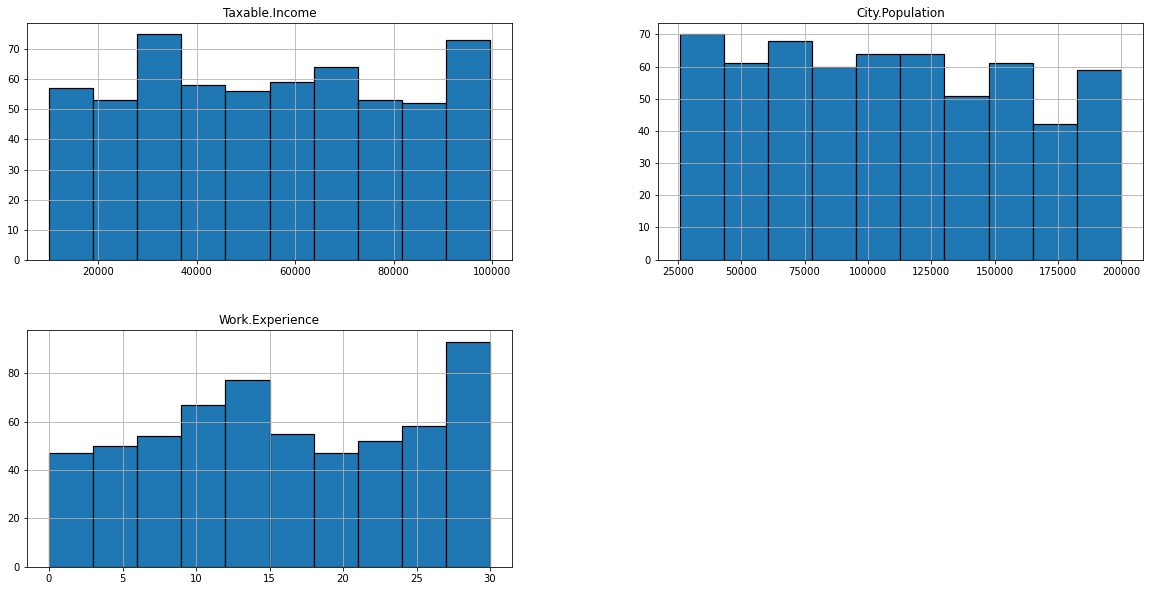

In [38]:
# Visulazing the distibution of the data for every feature
frd.hist(edgecolor='black', linewidth=1.2, figsize=(20,10));

<AxesSubplot:>

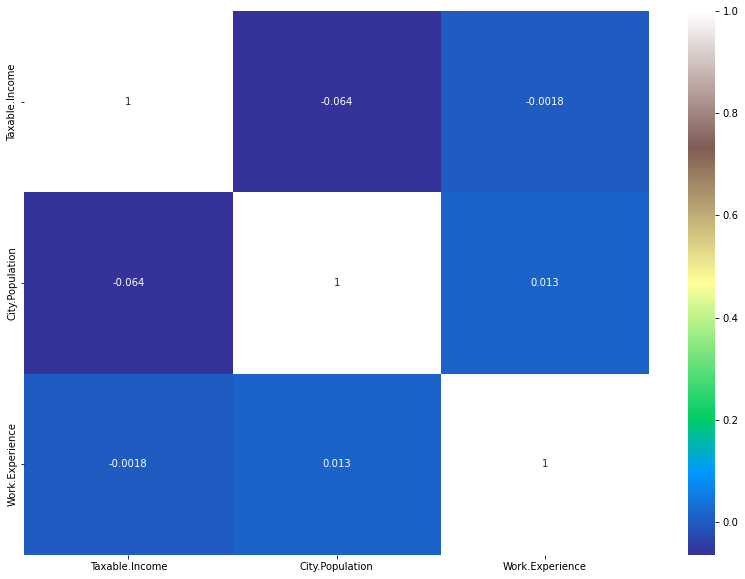

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(frd.corr(),annot=True,cmap='terrain')

In [10]:
DF=pd.Series(frd['Taxable.Income'])
su=[]
for i in DF:
    if i<=30000:
        su.append("risky")
    else:
        su.append('good')
print(su)

['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'ris

In [11]:
DF2=pd.DataFrame(su)
DF2=pd.concat([DF2,frd],axis=1)
DF2=DF2.rename({0:'o/p'},axis=1)

In [12]:
DF2

,o/p,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,good,NO,Single,68833,50047,10,YES
1,good,YES,Divorced,33700,134075,18,YES
2,good,NO,Married,36925,160205,30,YES
3,good,YES,Single,50190,193264,15,YES
4,good,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...,...
595,good,YES,Divorced,76340,39492,7,YES
596,good,YES,Divorced,69967,55369,2,YES
597,good,NO,Divorced,47334,154058,0,YES
598,good,YES,Married,98592,180083,17,NO


In [13]:
labelencoder=LabelEncoder()
DF2.iloc[:,0]=labelencoder.fit_transform(DF2.iloc[:,0])
DF2.iloc[:,1]=labelencoder.fit_transform(DF2.iloc[:,1])
DF2.iloc[:,2]=labelencoder.fit_transform(DF2.iloc[:,2])
DF2.iloc[:,-1]=labelencoder.fit_transform(DF2.iloc[:,-1])

In [14]:
DF2

,o/p,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,2,68833,50047,10,1
1,0,1,0,33700,134075,18,1
2,0,0,1,36925,160205,30,1
3,0,1,2,50190,193264,15,1
4,0,0,1,81002,27533,28,0
...,...,...,...,...,...,...,...
595,0,1,0,76340,39492,7,1
596,0,1,0,69967,55369,2,1
597,0,0,0,47334,154058,0,1
598,0,1,1,98592,180083,17,0


In [15]:
x=DF2.iloc[:,1:7]
y=DF2.iloc[:,0]

In [50]:
# Bagged Decision Trees for Classification
kfold = KFold(n_splits=10, random_state=seed , shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.8225000000000001


In [51]:
# Random Forest Classification
num_trees = 100
max_features = 3 #supplying 3 features for each subsamples
kfold = KFold(n_splits=10, random_state=7, shuffle= True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.825


In [52]:
# AdaBoost Classification
num_trees = 10 #connecting in squence 
seed=7 #random state
kfold = KFold(n_splits=10, random_state=seed , shuffle= True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.8450000000000001
